# Aviation Accident Analysis

# Business Understanding

The company is planning to purchase airplanes to expand the business and begin operating commercial and private flights. The Head of Aviation wants to know which airplanes are the lowest risk for the company to purchase. My analysis will help them determine which manufacturers and models have the lowest fatality rates from the past 30 years. After my recommendations, the Head of Aviation plans to determine the costs of purchasing and maintaining these airplanes.

# Data Understanding

The dataset is from the National Transportation Safety Board. It includes civil aviation accidents and other selected incidents from 1962 to 2023. This step is focused on understanding what is in the dataset so it can be further analyzed to answer the business question.

Each record of this dataset represents an aviation accident, marked by the "Event ID", with information about the plane (make, model, etc.) and the severity of the accident (# of injuries). This information is useful to determine which airplane manufacturers and models have the lowest fatality rates. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import aviation and us stat code csv files
aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')
us_state_df = pd.read_csv('./data/USState_Codes.csv', encoding='latin-1')

/var/folders/sk/8hr8rsms4cb5y3ryy9w5yplh0000gn/T/ipykernel_2535/3088602378.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
#Print first few rows of the dataframe
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#Print the shape of aviation_df
aviation_df.shape

(88889, 31)

In [5]:
#print general information on aviation_df
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
#Print the percentage of data missing in each column
round(aviation_df.isna().sum()/ aviation_df.shape[0] * 100, 1)

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.6
Airport.Name              40.7
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.6
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

The dataset comprises of mostly objects with a few columns that contain floats. The columns with floats will be analyzed in more detail. The previous code shows there is a lot of data missing and the dataset will need to be cleaned before analysis.

In [7]:
#Check different Make of Airplanes
aviation_df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [8]:
#Check for duplicates in the dataframe
aviation_df[aviation_df.duplicated()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date


In [9]:
#Checking for any extraneous values that may be used to replace missing data
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Preparation

The aviation data set needs to be cleaned and organized so that the analysis will produce clear and accurate results. 

The "Make" column needs to be normalized so there are no repeat values with different formats. Less than 15% of the injury data is missing, therefore those rows can be removed. There do not appear to be any extraneous values that are used to represent missing data. 

The dataset includes incidents from 60 years ago, but this date range is too far back. Accidents from the '60s and '70s are interesting to know, but planes built over 30 years ago will not be purchased. The dataset will be sorted from the past 30 years to better understand the safety of current planes. Additional columns will be created to help filter data for analysis, such as "Year" and "Make/Model".


In [10]:
#Normalize "Make" Column Data
aviation_df['Make'] = aviation_df['Make'].str.lower().str.title()

In [11]:
#Reformat Column Names to remove periods between words
aviation_df.columns = aviation_df.columns.str.replace('.', ' ').str.title()

In [12]:
#Convert Event Date to datetime object
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])

recent_aviation_df = aviation_df[aviation_df['Event Date'] > '1993-01-01'].reset_index()

In [13]:
#Remove rows with missing data on injuries
recent_aviation_df.dropna(axis = 0, subset = ['Total Fatal Injuries', 'Total Serious Injuries',\
                                              'Total Minor Injuries', 'Total Uninjured'],\
                                    inplace = True)


In [14]:
#Create new column with Make and Model data
recent_aviation_df['Make/Model'] = recent_aviation_df['Make'] + ' - ' + recent_aviation_df['Model']

# Exploratory Data Analysis

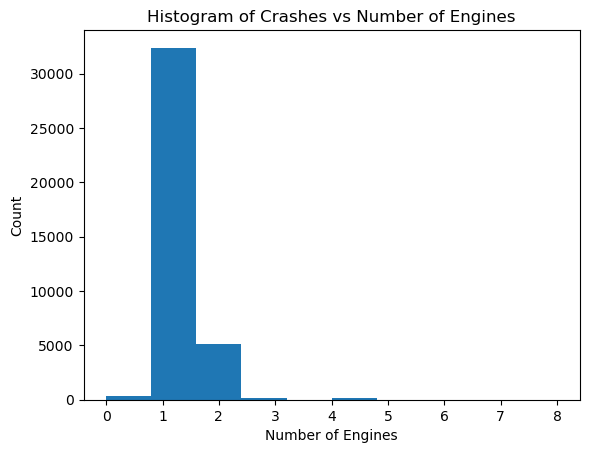

In [15]:
#Plot histogram of crashes based on the number of engines
fig, ax = plt.subplots()
ax.hist(recent_aviation_df['Number Of Engines'])
ax.set_title('Histogram of Crashes vs Number of Engines')
ax.set_ylabel('Count')
ax.set_xlabel('Number of Engines')

plt.savefig("./images/Number_engines_crashes_hist.png", dpi=150)
plt.show()

In [16]:
#Count Number of Engines as percentage of incidents in dataframe
recent_aviation_df['Number Of Engines'].value_counts(normalize = True)

Number Of Engines
1.0    0.847892
2.0    0.134067
0.0    0.009767
4.0    0.004635
3.0    0.003535
8.0    0.000079
6.0    0.000026
Name: proportion, dtype: float64

The histogram above shows that aircraft with one engine or less account for 85% of all crashes in this dataset. The Head of Aviation should only consider airplanes with at least 2 engines to promote safety. This information helps organize the dataset into fewer rows and fewer model types have to be considered.

In [17]:
#Ignore planes with one engine or less as they account for 85% of all incidents. 
#Create a new dataframe with airplanes that have 2 or more engines.
big_aircraft_df = recent_aviation_df[recent_aviation_df['Number Of Engines'] >= 2].reset_index()

In [18]:
#Create column with only Year of incident
big_aircraft_df['Year'] = [year.strftime("%Y") for year in big_aircraft_df['Event Date']]

Boeing, Airbus, Cessna, Piper, and Beech are prominent airplane manufacturers that should be considered when purchasing airplanes. These manufacturers have the highest number of incidents within this dataset. However, they produce different-sized airplanes for different uses. I am separating the dataset by these manufacturers to compare data among similar plane sizes. 

In [19]:
#Create two separate dataframes with small and large airplanes
large_planes = big_aircraft_df[(big_aircraft_df['Make'] == 'Boeing') | (big_aircraft_df['Make'] == 'Airbus')]
small_planes = big_aircraft_df[(big_aircraft_df['Make'] == 'Cessna') | (big_aircraft_df['Make'] == 'Piper') \
                                                                     | (big_aircraft_df['Make'] == 'Beech')]

In [20]:
#Group by Make/Model to get average fatality and injury rates. 
large_planes_injuries = large_planes.groupby('Make/Model')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg('mean')
large_planes_injuries['Total Number of Incidents'] = large_planes['Make/Model'].value_counts()
top_large_planes_injuries = large_planes_injuries.sort_values('Total Number of Incidents', ascending = False)[0:10]

In [21]:
#Group by Make/Model to get average fatality and injury rates. 
small_planes_injuries = small_planes.groupby('Make/Model')\
            [['Total Fatal Injuries','Total Serious Injuries','Total Minor Injuries','Total Uninjured']].agg('mean')
small_planes_injuries['Total Number of Incidents'] = small_planes['Make/Model'].value_counts()
top_small_planes_injuries = small_planes_injuries.sort_values('Total Number of Incidents', ascending = False)[0:25]

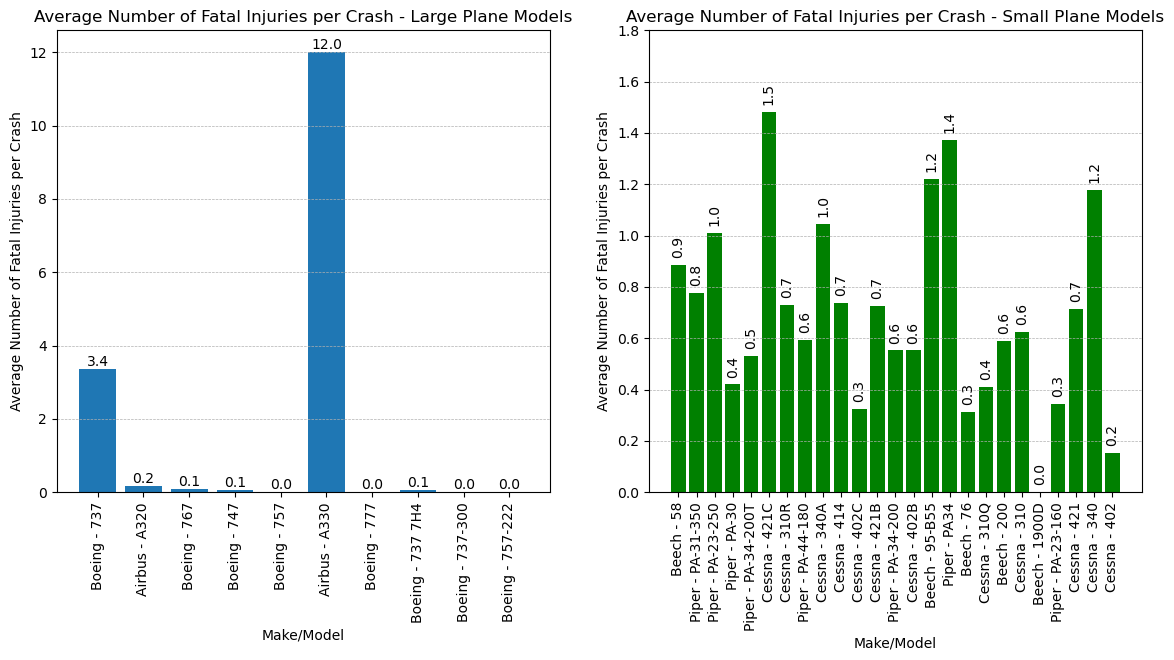

In [22]:
#Plot average number of fatal injuries for large and small planes
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

x1 = top_large_planes_injuries.index
x2 = top_small_planes_injuries.index
h1 = top_large_planes_injuries['Total Fatal Injuries']
h2 = top_small_planes_injuries['Total Fatal Injuries']

plot_1=ax[0].bar(x = x1, height = h1)
ax[0].set_xlabel('Make/Model')
ax[0].set_ylabel('Average Number of Fatal Injuries per Crash')
ax[0].set_title ('Average Number of Fatal Injuries per Crash - Large Plane Models')
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].grid(visible = True, which = 'both', axis = "y",linestyle='--', linewidth=0.5)
ax[0].bar_label(plot_1,fmt='%.1f')

plot_2 = ax[1].bar(x = x2, height = h2, color = 'green')
ax[1].set_xlabel('Make/Model')
ax[1].set_ylabel('Average Number of Fatal Injuries per Crash')
ax[1].set_title('Average Number of Fatal Injuries per Crash - Small Plane Models')
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].grid(visible = True, which = 'both', axis = "y",linestyle='--', linewidth=0.5)
ax[1].bar_label(plot_2,fmt='%.1f',rotation = 90, padding = 5)
ax[1].set_ylim([0,1.8])

plt.savefig("./images/Avg_fatal_injuries_makemodel.png", dpi=150, bbox_inches = 'tight')
plt.show()

These plots provide a better understanding of airplane types that have had the fewest number of deaths per crash. Airplane crashes happen, but reducing the number of passenger deaths is the primary goal when selecting an airplane to purchase.

In [23]:
#Create dataframe of number of crashes per year for each selected manufacturer
makes = ['Boeing','Airbus','Cessna','Beech','Piper']
crashes_make_per_yr = pd.DataFrame()

for make in makes:
    if (make == 'Boeing') | (make == 'Airbus'):
        make_crashes = large_planes[large_planes['Make'] == make].value_counts('Year').sort_index()
    else:
        make_crashes = small_planes[small_planes['Make'] == make].value_counts('Year').sort_index()
    make_crashes.name = make
    crashes_make_per_yr = crashes_make_per_yr.join(make_crashes, how = 'outer')

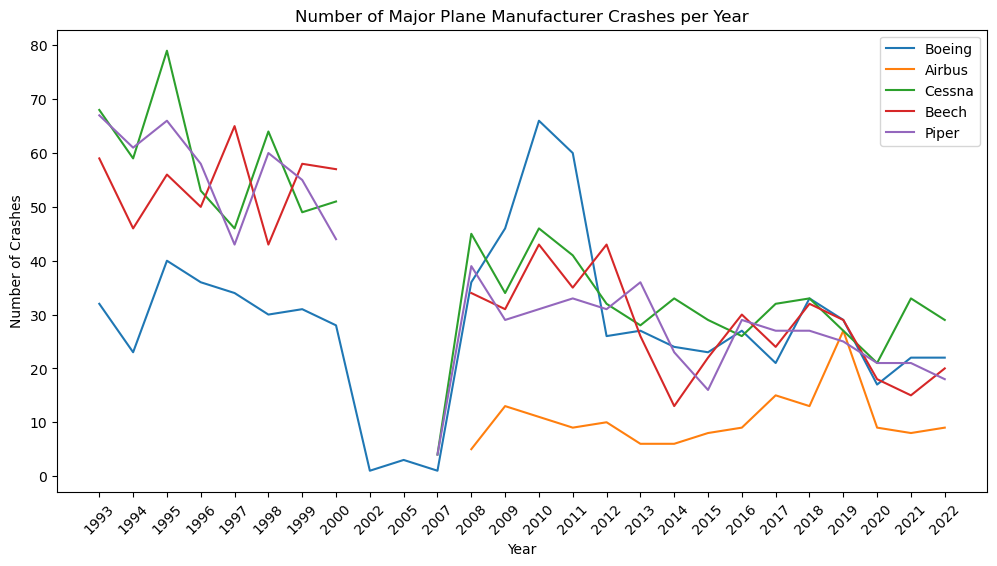

In [24]:
#plot number of crashes per year of each selected manufacturer
fig , ax = plt.subplots(figsize=(12,6))

y=crashes_make_per_yr
x=crashes_make_per_yr.index

ax.plot(x,y)
ax.tick_params(axis='x', labelrotation=45)
ax.legend(crashes_make_per_yr.columns)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crashes')
ax.set_title('Number of Major Plane Manufacturer Crashes per Year')

plt.savefig("./images/crashes_per_yr.png", dpi=150)
plt.show()

These manufacturers had no crashes or crashes were not reported from 2000 - 2008. The cause of this is unknown. Overall trends of major manufacturers show fewer incidents over time. Planes are getting safer with improved manufacturing, technology, and increased pilot training.

In [25]:
#Export cleaned dataframe for Tableau dashboards
big_aircraft_df.to_csv('./data/AviationData_Cleaned.csv', index=False)

# Conclusion and Recommendations

The analysis leads to the following three recommendations for the Head of Aviation:

  1) Since 1923, approximately 85% of airplane accidents are planes with single engines. To ensure the most safety, planes with **at least 2 engines** should be considered. 
  3)  The **Boeing 757** or **Airbus A319** should be considered if the company plans to operate large commercial flights with over 100 passengers. These two models have had zero deaths in the past 30 years.
      If the company plans to operate flights with fewer than 20 passengers, the **Beech 1900D** and **Cessna 402** should be considered. They have the lowest fatality rates in the past 30 years among small plane models. 
  5) The number of plane crashes per year is trending down. This is expected to continue, therefore **safety reviews** of the company's fleet should be conducted **every 10 years** to ensure they own and operate the safest planes on the market. 

## Next Steps

Additional analysis can be conducted to assist the Head of Aviation. I believe the following questions should be considered next:

* What are the financial costs of owning/operating these planes? What are the maintenance costs? What is the profitability of this business?
* Where should our planes be operated? Are there specific airports and locations that we will fly to to reduce the possibility of crashes?